In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

In [3]:
def forward(X, W, b):
    return sigmoid(X.dot(W)+b)

In [4]:
def classification_rate(Y, P):
    return np.mean(Y==P)

In [5]:
def cross_entropy(T, Y):
    return -np.mean(T*np.log(Y+1e-9) + (1-T)*np.log(1-Y+1e-9))

# Experimenting with random data

In [116]:
N = 1000
D = 2

In [117]:
X = np.random.randn(N,D)
ones = np.ones((N,1))
print(X.shape, ones.shape)

(1000, 2) (1000, 1)


In [118]:
n=500
X[:n,:] = X[:n,:] - 2*np.ones((n,D))
X[n:,:] = X[n:,:] + 2*np.ones((n,D))
Xb = np.concatenate((ones,X), axis=1)
T = np.array([0]*n + [1]*(N-n))

In [119]:
print(Xb.shape)

(1000, 3)


In [120]:
w = np.random.randn(D+1)
print(w.shape)

(3,)


In [121]:
z = Xb.dot(w)
print(z.shape)

(1000,)


In [122]:
w_sol = np.array([0,4,4])

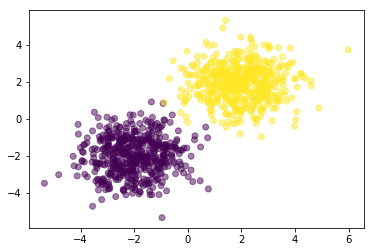

In [123]:
plt.scatter(X[:,0],X[:,1], c=T, alpha=0.5)

In [125]:
learning_rate = 0.1
lambda_reg = 0.1
for i in range(10000):    
    Y = sigmoid(Xb.dot(w))
    w += learning_rate*(np.dot((T-Y).T,Xb) - lambda_reg*w)
    
    if i%1000==0:
        print(cross_entropy(T,Y))
    
print('Final w = ', w)

D:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


20.6610960394
0.00582418610573
0.00582418610573
0.00582418610573
0.00582418610573
0.00582418610573
0.00582418610573
0.00582418610573
0.00582418610573
0.00582418610573
Final w =  [ 0.11116599  3.59138587  4.10500883]


In [40]:
xx, yy = np.mgrid[-6:6:.01, -6:6:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
ones = np.ones((grid.shape[0],1))
grid_b = np.concatenate((ones,grid), axis=1)
probs = forward(grid, w[1:3], w[0])

In [42]:
zi = griddata(xx, yy, probs, xi, yi, interp='linear')
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)

(1440000,)


In [45]:
print(np.sum(probs>1e-5))


1103335


# With e-commerce data

In [126]:
file_name = "../ann_logistic_extra/ecommerce_data.csv"

In [127]:
from process import get_binary_data, get_data

In [128]:
X, Y = get_binary_data(file_name)
print(X.shape)
np.savetxt("foo.csv", X, delimiter=",")

(398, 8)


In [129]:
from sklearn.utils import shuffle

In [130]:
X, Y = shuffle(X,Y)

In [131]:
D = X.shape[1]

In [132]:
W = np.random.randn(D)
b = 0

In [133]:
X_train = X[:-100,:]
Y_train = Y[:-100]
X_test = X[-100:,:]
Y_test = Y[-100:]

0 :  1.02946987766 ,  0.945641591752


D:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


1000 :  12.9346558576 ,  13.8845881104
2000 :  12.9346558576 ,  13.8845881104
3000 :  12.9346558576 ,  13.8845881104
4000 :  12.9346558576 ,  13.8845881104
5000 :  12.9346558576 ,  13.8845881104
6000 :  12.9346558576 ,  13.8845881104
7000 :  12.9346558576 ,  13.8845881104
8000 :  12.9346558576 ,  13.8845881104
9000 :  12.9346558576 ,  13.8845881104
10000 :  12.9346558576 ,  13.8845881104
11000 :  12.9346558576 ,  13.8845881104
12000 :  12.9346558576 ,  13.8845881104
13000 :  12.9346558576 ,  13.8845881104
14000 :  12.9346558576 ,  13.8845881104
15000 :  12.9346558576 ,  13.8845881104
16000 :  12.9346558576 ,  13.8845881104
17000 :  12.9346558576 ,  13.8845881104
18000 :  12.9346558576 ,  13.8845881104
19000 :  12.9346558576 ,  13.8845881104
20000 :  12.9346558576 ,  13.8845881104
21000 :  12.9346558576 ,  13.8845881104
22000 :  12.9346558576 ,  13.8845881104
23000 :  12.9346558576 ,  13.8845881104
24000 :  12.9346558576 ,  13.8845881104
25000 :  12.9346558576 ,  13.8845881104
26000 :  

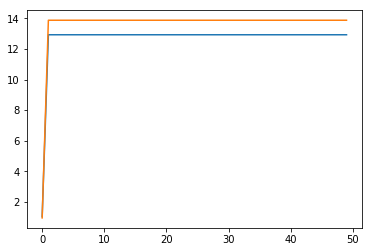

In [134]:
train_costs = []
test_costs = []
learning_rate = 0.1
lambda_reg = 0.1
for i in range(50000): 
    pYtrain = forward(X_train, W, b)
    pYtest = forward(X_test, W, b)
    
    ctrain = cross_entropy(Y_train,pYtrain)
    ctest = cross_entropy(Y_test,pYtest)
    
    W -= learning_rate*(X_train.T.dot(pYtrain-Y_train) + lambda_reg*W)
    b -= learning_rate*(pYtrain-Y_train).sum()
    
    if i%1000==0:
        print(i, ": ", ctrain, ", ", ctest)
        train_costs.append(ctrain)
        test_costs.append(ctest)
        
    
print("Final training classification rate :", classification_rate(P=np.round(pYtrain), Y=Y_train))
print("Final test classification rate :", classification_rate(P=np.round(pYtest), Y=Y_test))

plt.plot(train_costs, label='train_costs')
plt.plot(test_costs, label='test_costs')

print("Final weights: ", W)

In [34]:
tmp = np.array(test_costs)
np.savetxt('foo.csv', tmp, delimiter=',')

0 :  0.491100161491 ,  0.439036971167
500 :  0.172261416722 ,  0.222558414698
1000 :  0.17181989045 ,  0.220833733962
1500 :  0.172182938304 ,  0.222286570665
2000 :  0.179050113087 ,  0.237655150202
2500 :  0.189640473069 ,  0.254723850106
3000 :  0.258387382684 ,  0.323268906003
3500 :  0.171939474022 ,  0.22136977376
4000 :  0.173798197528 ,  0.226658992562
4500 :  0.171621051307 ,  0.219243114577
5000 :  0.172631989486 ,  0.223710152074
5500 :  0.172343768005 ,  0.222827960732
6000 :  0.171683149903 ,  0.22005159866
6500 :  0.17347333421 ,  0.225969366835
7000 :  0.171620503577 ,  0.219349648486
7500 :  0.334022244668 ,  0.41909865773
8000 :  0.194753784851 ,  0.261478134258
8500 :  0.17450304299 ,  0.228419301815
9000 :  0.683330281243 ,  0.69135591332
9500 :  0.171646713793 ,  0.21948867148
Final training classification rate : 0.973154362416
Final test classification rate : 0.96
Final weights:  [  2.57661175  10.89220217   1.03284006   3.24934831   0.71448471
  -0.15681118  -0.32

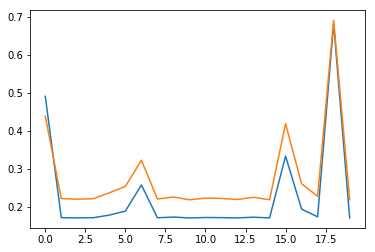

In [54]:
train_costs = []
test_costs = []
learning_rate = 0.1
lambda_reg = 0.5
for i in range(10000): 
    pYtrain = forward(X_train, W, b)
    pYtest = forward(X_test, W, b)
    
    ctrain = cross_entropy(Y_train,pYtrain)
    ctest = cross_entropy(Y_test,pYtest)
    
    W += learning_rate*(X_train.T.dot(pYtrain-Y_train))
    b += learning_rate*(pYtrain-Y_train).sum()
    
    if i%500==0:
        print(i, ": ", ctrain, ", ", ctest)
        train_costs.append(ctrain)
        test_costs.append(ctest)
        
    
print("Final training classification rate :", classification_rate(P=np.round(pYtrain), Y=Y_train))
print("Final test classification rate :", classification_rate(P=np.round(pYtest), Y=Y_test))

plt.plot(train_costs, label='train_costs')
plt.plot(test_costs, label='test_costs')

print("Final weights: ", W)

# L1 regularization

In [135]:
N = 50
D = 50

In [136]:
# uniformly distributed numbers between -5, +5
X = (np.random.random((N, D)) - 0.5)*10

In [138]:
# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))
print(true_w)

[ 1.   0.5 -0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0. ]


In [140]:
# generate Y - add noise with variance 0.5
Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N)*0.5))
print(Y)

[ 1.  0.  0.  0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.  1.
  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.]


In [141]:
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
learning_rate = 0.001
l1 = 3.0 # try different values - what effect does it have on w?
for t in range(5000):
  # update w
  Yhat = sigmoid(X.dot(w))
  delta = Yhat - Y
  w -= learning_rate*(X.T.dot(delta) + l1*np.sign(w))

  # find and store the cost
  cost = -(Y*np.log(Yhat) + (1-Y)*np.log(1 - Yhat)).mean() + l1*np.abs(w).mean()
  costs.append(cost)

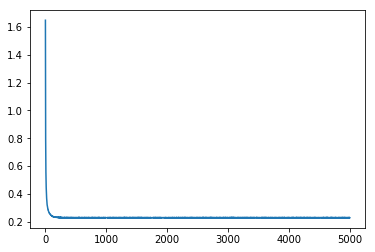

In [144]:
plt.plot(costs, label='cost')

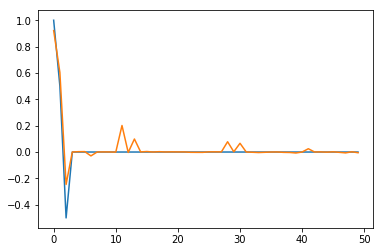

In [145]:
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')

# Donut

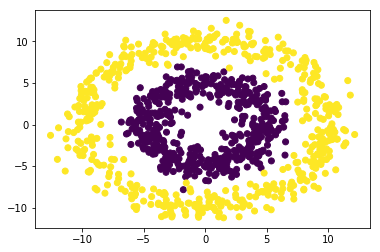

In [173]:
N = 1000
D = 2

R_inner = 5
R_outer = 10

# distance from origin is radius + random normal
# angle theta is uniformly distributed between (0, 2pi)
R1 = np.random.randn(N//2) + R_inner
theta = 2*np.pi*np.random.random(N//2)
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.randn(N//2) + R_outer
theta = 2*np.pi*np.random.random(N//2)
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

X = np.concatenate([ X_inner, X_outer ])
T = np.array([0]*(N//2) + [1]*(N//2)) # labels: first 50 are 0, last 50 are 1

plt.scatter(X[:,0], X[:,1], c=T)
plt.show()

In [174]:
ones = np.ones((N,1))
r = np.sum(np.sqrt(X*X), axis=1).reshape((N,1))

In [175]:
Xb = np.concatenate((ones, r, X), axis=1)
# print(X.shape, r.shape, ones.shape)

In [176]:
w = np.random.randn(D+2)

error:  3.81394995915
error:  0.174204332976
error:  0.12143722358
error:  0.101130008159
error:  0.0900940518642
Final weights:  [ -1.12938022e+01   1.23940316e+00  -1.00532830e-02  -8.89319354e-03]
Classification rate:  0.979


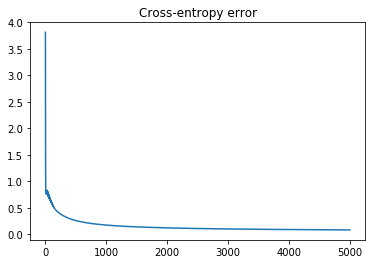

In [177]:
error = []
for i in range(5000):
    Y = sigmoid(Xb.dot(w))
    e = cross_entropy(T, Y)
    error.append(e)
    if i%1000==0:
        print("error: ", e)
    
    w += 0.0001*(Xb.T.dot(T-Y) - 0.1*w)
    
plt.plot(error)
plt.title("Cross-entropy error")
print("Final weights: ", w)
print("Classification rate: ", 1 - np.abs(np.round(Y)-T).sum()/N)

# XOR

In [178]:
N = 4
D = 2

# XOR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
T = np.array([0, 1, 1, 0])

# add a column of ones
# ones = np.array([[1]*N]).T
ones = np.ones((N, 1))

# add a column of xy = x*y
xy = (X[:,0] * X[:,1]).reshape(N, 1)
Xb = np.concatenate((ones, xy, X), axis=1)

In [183]:
print(Xb)

[[ 1.  0.  0.  0.]
 [ 1.  0.  0.  1.]
 [ 1.  0.  1.  0.]
 [ 1.  1.  1.  1.]]


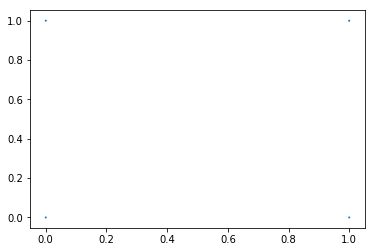

In [182]:
plt.scatter(Xb[1,:],Xb[2,:],Xb[3,:])